In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation
#import cartopy.crs as ccrs
#import cartopy.io.shapereader as shpreader
from math import log
from math import exp
from matplotlib import colors
import numpy as np
%matplotlib inline

In [2]:
worldgdo =  gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [32]:
worldgdo.head(50)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,2.840000e+07,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,1.279929e+07,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3.639453e+06,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4.798491e+06,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,4.091358e+07,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...
5,2.967004e+06,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,..."
6,3.802000e+03,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...
7,1.400000e+02,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16.0,"POLYGON ((68.935 -48.62500000000001, 69.58 -48..."
8,2.126264e+07,Oceania,Australia,AUS,800200.0,(POLYGON ((145.3979781434948 -40.7925485166058...
9,8.210281e+06,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,..."


In [4]:
world = worldgdo[['geometry','name','iso_a3']]

In [5]:
world.head()

,geometry,name,iso_a3
0,"POLYGON ((61.21081709172574 35.65007233330923,...",Afghanistan,AFG
1,(POLYGON ((16.32652835456705 -5.87747039146621...,Angola,AGO
2,"POLYGON ((20.59024743010491 41.85540416113361,...",Albania,ALB
3,"POLYGON ((51.57951867046327 24.24549713795111,...",United Arab Emirates,ARE
4,(POLYGON ((-65.50000000000003 -55.199999999999...,Argentina,ARG


In [8]:
df_gb_cc = pd.read_csv('climateChangeGlobal.csv')
df_gb_cc.head()

,country,variable,year,average
0,AG,PRCP,1890,20.379607
1,AG,TMAX,1890,217.484350
2,AG,TMIN,1890,101.691736
3,AJ,PRCP,1890,5.570815
4,AJ,TAVG,1890,131.547945


In [14]:
#note this is where we decide which data type to use
var = 'TMAX'

#out_g = pd.DataFrame(columns = ['country','average','year','variable','var2'])
out_g = df_gb_cc[df_gb_cc.variable==var]


#rolling average isnt working not bothering
#print(g.dtypes)
#countries = g.country.unique()
#for land in countries:
#    g_count = g[g.country==land]
#    tg_roll = g_count[.rolling(10,min_periods=5,center=True,on='year') #This is where we decide the rolling average width (1st input in function)
#    tg = tg_roll.mean()
#    tg=tg.sort_values('year')
#    tg['var2'] = np.gradient(tg.average.values) 
    
#    out_g = out_g.append(tg)

In [15]:
#this is where I take the subvariable calculated

subvar = 'average'

In [21]:
out_g.describe()

,year,average
count,11855.000000,11855.000000
mean,1965.650527,223.621251
std,27.977336,254.960518
min,1890.000000,-206.990502
25%,1950.000000,140.565439
50%,1973.000000,234.406368
75%,1988.000000,299.383847
max,2002.000000,9990.000000


In [25]:
varmin

nan

In [26]:
#get max and mins of data to scale colormap
varmax = out_g.average.max()
varmin = out_g.average.min()
cbrange = np.arange(varmin,varmax,int((varmax-varmin)/4))
#set up colorbar
normo = colors.Normalize(vmin = -varmax,vmax=varmax) #creates a normalized version of our data spread
cmapo = mpl.cm.ScalarMappable(norm = normo, cmap = 'coolwarm').cmap #creates ths custom colormap scaled how we want it

ValueError: zero-size array to reduction operation minimum which has no identity

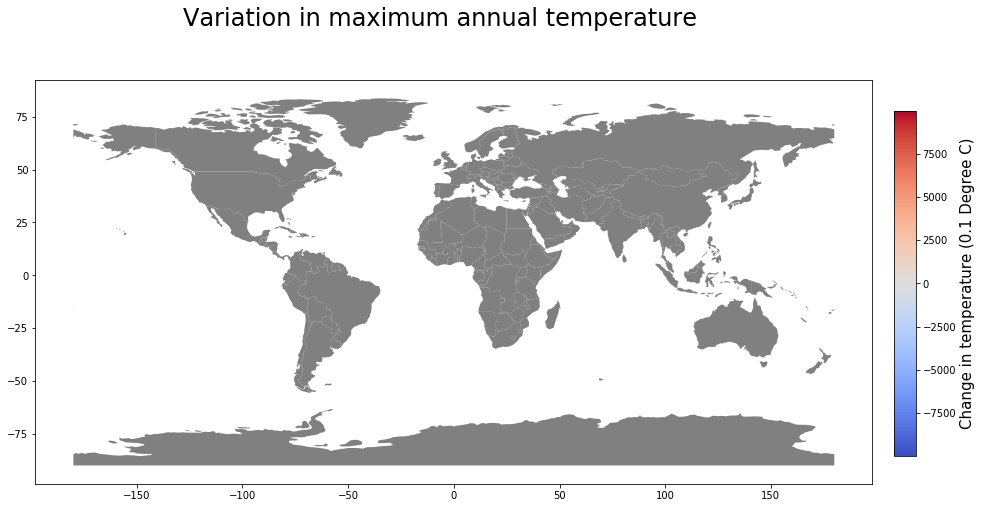

In [29]:
# matplotlib creates an emtpy plot 
fig, ax = plt.subplots(figsize=(15,8))
ax.set_aspect('equal')
fig.suptitle('Variation in maximum annual temperature', fontsize=24)

def init():
    world.plot(ax=ax, color='grey')

def run(data):
    year = data+1947
    right_merge = out_g[out_g.year==year]
    right_merge = right_merge.set_index('country')
    worldm = world.merge(right_merge, left_on = 'iso_a3',right_index=True)
    worldm.plot(ax=ax, column = subvar, cmap=cmapo, label = 'Minimum Temp')
    ax.set_title('Year: ' + str(year), fontsize=20)
    
cax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cb = mpl.colorbar.ColorbarBase(cax, cmap=cmapo, norm=normo, spacing='proportional')
cb.set_label('Change in temperature (0.1 Degree C)', fontsize=15)

ani = animation.FuncAnimation(fig, run, init_func=init, frames=56,
                              interval=500, blit=False)
from matplotlib import rc
rc('animation', html='html5')
ani